In [49]:
# prepares the notebook for "inline" graphing, and imports matplotlib library
%matplotlib inline
%config InlineBackend.figure_format='svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import matplotlib.cbook as cbook
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os import listdir
from os.path import isfile, join

In [50]:
class DataSet:
    def __init__(self, size, vThresh, vHold):
        self.size = size
        self.vThresh = vThresh
        self.vHold = vHold
        self.cycles = list(range(1,len(vThresh) + 1))

In [51]:
filePath = r"C:\Users\Ted Mburu\NbO2\SelectorIV\CompleteData_negative.csv"
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data = df5.values
df5.head()

negativeVoltages = []
negativeSizes = data[1][0].split(",")

for x in range(1, len(negativeSizes)):
    negativeSizes[x] = negativeSizes[x][:-2]
    negativeSizes[x] = negativeSizes[x] + "x" + negativeSizes[x] + r" nm$^2$"
    
uniqueNegSizes = []
for x in range(len(negativeSizes)):
    uniqueNegSizes.append(negativeSizes[x])
uniqueNegSizes = pd.unique(uniqueNegSizes)[1:]

sizes = [negativeSizes[3], negativeSizes[11], negativeSizes[19], negativeSizes[27], negativeSizes[35]]
vThreshColumns = [3, 11, 19, 27, 35]
vHoldColumns = [7, 15, 23, 31, 39]

for x in range(len(sizes)):
    vThresh = []
    vHold = []
    for y in range(2, 1002):
        rowData = data[y][0].split(",")
        vThresh.append(rowData[vThreshColumns[x]])
        vHold.append(rowData[vHoldColumns[x]])
    negativeVoltages.append(DataSet(sizes[x], np.array(vThresh), np.array(vHold)))

In [52]:
filePath = r"C:\Users\Ted Mburu\NbO2\SelectorIV\CompleteData_positive.csv"
df5 = pd.read_csv(filePath, names=['Time (s)','Current (A)','Voltage (V)'],sep='\t',skiprows=1)
data = df5.values
df5.head()

positiveVoltages = []
positiveSizes = data[1][0].split(",")

for x in range(len(sizes)):
    vThresh = []
    vHold = []
    for y in range(2, 1002):
        rowData = data[y][0].split(",")
        vThresh.append(rowData[vThreshColumns[x]])
        vHold.append(rowData[vHoldColumns[x]])
    positiveVoltages.append(DataSet(sizes[x], np.array(vThresh), np.array(vHold)))

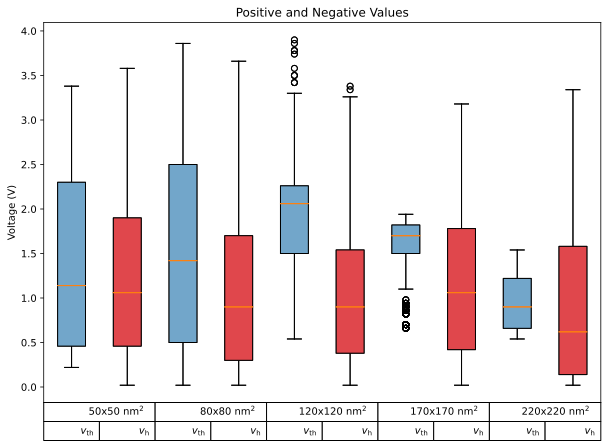

In [53]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
dataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            dataToPlot.append(np.concatenate((negVThresh, posVThresh)))
            dataToPlot.append(np.concatenate((negVHold, posVHold)))
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(dataToPlot[x])
    
    
plt.boxplot(dataToPlot)

title = "Positive and Negative Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])
holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

# nValues = []
# for x in range(len(negativeVoltages)):
#     nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
# mValues = []
# for x in range(len(negativeVoltages)):
#     mValues.append("m = 100")

# cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

# cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

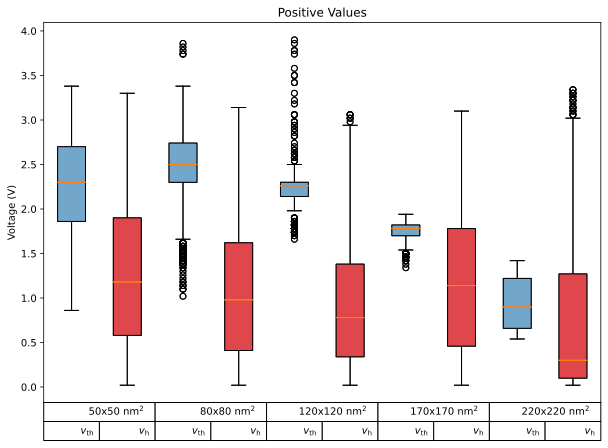

In [54]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
dataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            dataToPlot.append(posVThresh)
            dataToPlot.append(posVHold)
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(dataToPlot[x])
    
    
plt.boxplot(dataToPlot)

title = "Positive Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])
holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

# nValues = []
# for x in range(len(negativeVoltages)):
#     nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
# mValues = []
# for x in range(len(negativeVoltages)):
#     mValues.append("m = 100")

# cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

# cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
# plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

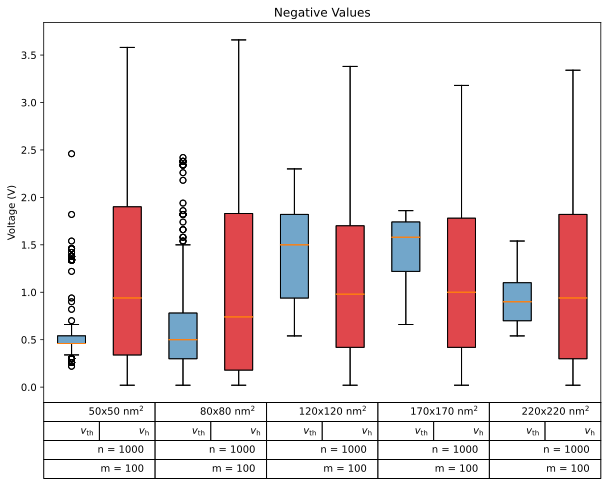

In [55]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# Creating plot
dataToPlot = []

# print(negativeVoltages[0].vThresh)

for size in uniqueNegSizes:
    for x in range(len(negativeVoltages)):
#         print(negativeVoltages[x].vThresh[0])
        if negativeVoltages[x].size == size:
            negVThresh = np.absolute(negativeVoltages[x].vThresh.astype(np.float64))
            negVHold = np.absolute(negativeVoltages[x].vHold.astype(np.float64))
            posVThresh = positiveVoltages[x].vThresh.astype(np.float64)
            posVHold = positiveVoltages[x].vHold.astype(np.float64)
            
#             print(negVHold[0])
            
            dataToPlot.append(negVThresh)
            dataToPlot.append(negVHold)
            
#             print(np.mean(np.concatenate((negVThresh, posVThresh))))

#             print(dataToPlot[x])
    
    
plt.boxplot(dataToPlot)

title = "Negative Values"
ax.set_title(title)
ax.set_ylabel('Voltage (V)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])

holdText = r"$v_\mathrm{h}$"
treshText = r"$v_\mathrm{th}$"
cell_text = [[treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText, treshText, holdText]]
plt.table(cellText=cell_text,bbox = [0, -0.1, 1, 0.05])

nValues = []
for x in range(len(negativeVoltages)):
    nValues.append("n = " + str(len(negativeVoltages[x].vThresh)))
    
mValues = []
for x in range(len(negativeVoltages)):
    mValues.append("m = 100")

cell_text = [[nValues[0], nValues[1], nValues[2], nValues[3], nValues[4] ]]
plt.table(cellText=cell_text,bbox = [0, -0.15, 1, 0.05])

cell_text = [[mValues[0], mValues[1], mValues[2], mValues[3], mValues[4] ]]
plt.table(cellText=cell_text,bbox = [0, -0.2, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 

# print(len(negativeVoltages[0].vThresh))
# we have micro meters
# these are nm

# 80 thesh is too low

# add maximum on distribution
# add color to the plot blue red

# send matt positives, negatives, both graphs

# label y axis

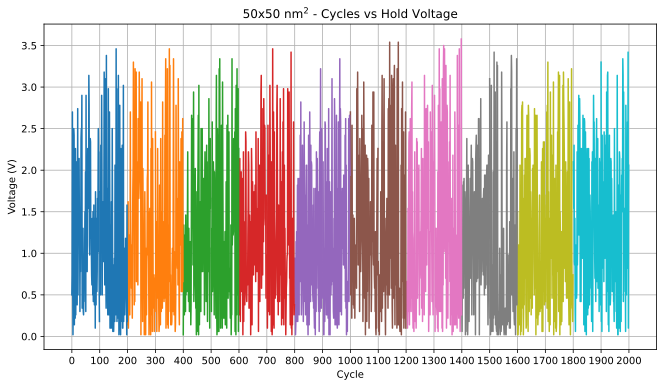

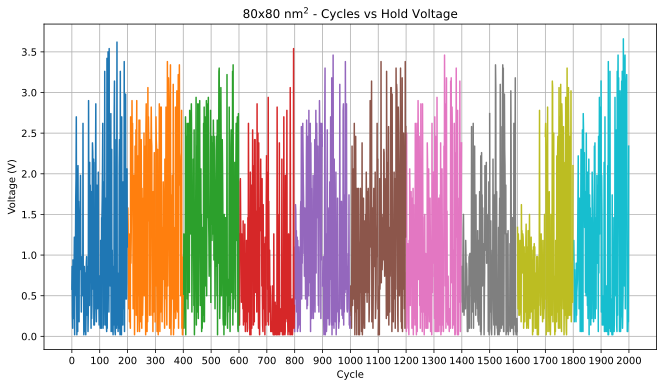

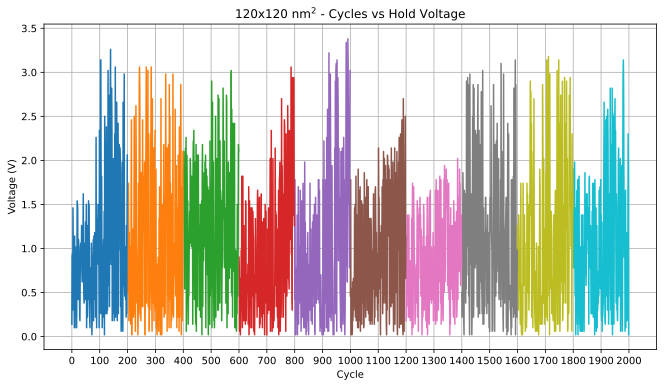

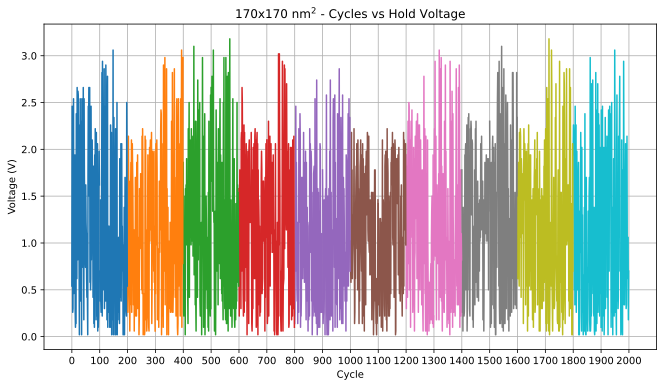

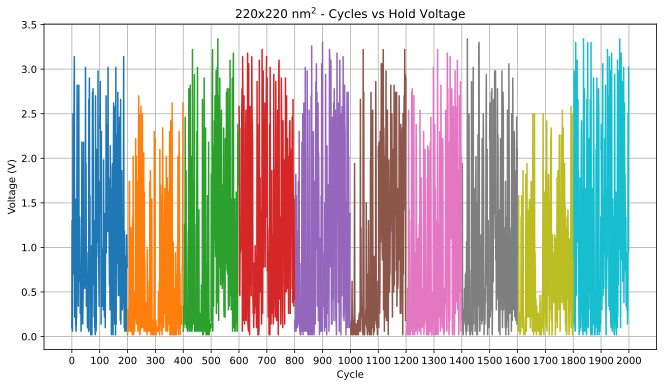

In [56]:
for x in range(len(positiveVoltages)):
    plt.rcParams['figure.figsize'] = (11,6)
    plt.figure(x)
    plt.grid()
#     plt.plot(positiveVoltages[x].cycles, positiveVoltages[x].vThresh)
#     plt.plot(negativeVoltages[x].cycles, negativeVoltages[x].vThresh)
    
    cyclesOne = [y for y in positiveVoltages[x].cycles]
    for a in range(10):
        cyclesOne[a * 100:(a * 100) + 100] = [k for k in range(a * 200,(a * 200) + 100)]
        movedData = np.array([float(ele) for ele in positiveVoltages[x].vHold])
        plt.plot(cyclesOne[a * 100:(a * 100) + 100],  movedData[a * 100:(a * 100) + 100])
    
    
    neg = [float(ele) for ele in negativeVoltages[x].vHold]
    cyclesTwo = [y for y in negativeVoltages[x].cycles]
    cyclesTwo = np.array(cyclesTwo)
    for a in range(10):
        cyclesTwo[a * 100:(a * 100) + 100] = [k for k in range((a * 200) + 100,(a * 200) + 200)]
        movedData = np.array([abs(ele) for ele in neg])
        plt.plot(cyclesTwo[a * 100:(a * 100) + 100],  movedData[a * 100:(a * 100) + 100])
        plt.xlabel('Cycle');
        plt.ylabel('Voltage (V)');
    plt.xticks(np.arange(0, 2001, 100))
    title = uniqueNegSizes[x] + " - Cycles vs Hold Voltage"
    plt.title(title);
    plt.savefig(title + r'.pdf', bbox_inches = 'tight')

In [57]:
mypath = r"C:\Users\Ted Mburu\NbO2\SelectorIV"

voltageToAnalyse = 0.4

# these functions are used in determining the type
# of data we are looking at (posthesh, neghold etc)
def isIncreasing(L):
    return L[0] < L[len(L) - 1]
def isDecreasing(L):
    return L[0] > L[len(L) - 1]
def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))
def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))
def monotonic(L):
    return non_increasing(L) or non_decreasing(L)
def average(array):
    return sum(array) / len(array)

# this will return the type of data you give it
# it takes an array of voltages and currents as arguments
def sortIntoSide(voltage, current):
    if isIncreasing(voltage) and isIncreasing(current):
        return "posThresh"
    elif isDecreasing(voltage) and isDecreasing(current):
        return "posHold"
    elif isDecreasing(voltage) and isIncreasing(current):
        return "negThresh"
    elif isIncreasing(voltage) and isDecreasing(current):
        return "negHold"
    else: 
        print("???")

class DataAtVoltage:
    def __init__(self, filePath):
        self.filePath = filePath
        self.getSize()
        self.getCurrents()
        self.getResistances()
        self.getData()
        self.sortRun()
        self.getLargestGradient()
        self.getLargestGradientVoltage()
        self.getLargestGradientCurrent()
#         self.getTitle()
    
#     def getTitle(self):
#         size = self.filePath.split("NbO2_")[1].split("_Dev")[0][:-2]
#         size = size + r"x" + size + r" nm$^2$"
#         self.size = size
        
    def getSize(self):
        size = self.filePath.split("NbO2_")[1].split("_Dev")[0][:-2]
        size = size + r"x" + size + r" nm$^2$"
        self.size = size
        
    def getCurrents(self):      
        df5 = pd.read_csv(self.filePath, names=['Voltage (V)', 'Current (A)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        allData = [float(data[63][0].split(",")[2]), float(data[244][0].split(",")[2])]
        self.currents = allData
        
    def getData(self):      
        df5 = pd.read_csv(self.filePath, names=['Voltage (V)', 'Current (A)'],sep='\t',skiprows=1)
        data = df5.values
        df5.head()
        allData = data[:,0][54:]
        I = [ele.split(",")[2] for ele in allData]
        V = [ele.split(",")[1] for ele in allData]
        
        self.I = [abs(float(ele)) for ele in I]
        self.V = [float(ele) for ele in V]

        self.I1 = self.I[0:100]
        self.V1 = self.V[0:100]
        self.I2 = self.I[100:200]
        self.V2 = self.V[100:200]
        
   
    # sorts runs into their types and stores them
    def sortRun(self):
        # self.secondDerivativeCurrent = np.gradient(np.gradient(self.I))

        secondDerivativeCurrent = np.gradient(np.gradient(self.I1))
        runType = sortIntoSide(self.V1, self.I1)
        currentRun = [ abs(x) for x in self.I1]
        runData = [self.V1, currentRun, secondDerivativeCurrent]
        self.runType1 = runType
        self.runData1 = runData

        secondDerivativeCurrent2 = np.gradient(np.gradient(self.I2))
        runType2 = sortIntoSide(self.V2, self.I2)
        currentRun = [ abs(x) for x in self.I2]
        runData2 = [self.V2, currentRun, secondDerivativeCurrent2]
        self.runType2 = runType2
        self.runData2 = runData2
    
    # find the index of the largest value in the 2nd derivative
    def getLargestGradient(self):
        self.largestGradient1 = np.argmax(np.absolute(self.runData1[2]))
        self.largestGradient2 = np.argmax(np.absolute(self.runData2[2]))
    
    # stores the voltage at the largest second derivative
    def getLargestGradientVoltage(self):
        self.largestGradientVoltage1 = self.V1[self.largestGradient1 - 2]
        self.largestGradientVoltage2 = self.V2[self.largestGradient2]
        
    # stores the current at the largest second derivative
    def getLargestGradientCurrent(self):
        self.largestGradientCurrent1 = self.I1[self.largestGradient1 - 2]
        self.largestGradientCurrent2 = self.I2[self.largestGradient2]
        
    def getResistances(self): 
        self.resitances = [voltageToAnalyse/self.currents[0], voltageToAnalyse/self.currents[1]]

In [58]:
allFiles = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
allFiles[0] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_12-30-59-017365_NbO2_50nm_DevX2Y1_DieX0Y0_50.csv")
allFiles[1] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_12-36-42-813978_NbO2_50nm_DevX2Y1_DieX0Y0_50.csv")

allFiles[2] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_15-07-22-593742_NbO2_80nm_DevX1Y2_DieX0Y0_50.csv")
allFiles[3] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_15-13-10-497013_NbO2_80nm_DevX1Y2_DieX0Y0_50.csv")

allFiles[4] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_17-16-46-101191_NbO2_120nm_DevX1Y1_DieX0Y0_50.csv")
allFiles[5] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220609_17-23-58-778105_NbO2_120nm_DevX1Y1_DieX0Y0_50.csv")

allFiles[6] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220610_13-55-06-230360_NbO2_170nm_DevX1Y1_DieX0Y0_50.csv")
allFiles[7] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220610_14-02-55-290537_NbO2_170nm_DevX1Y1_DieX0Y0_50.csv")

allFiles[8] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220610_17-50-38-325460_NbO2_220nm_DevX1Y1_DieX0Y0_50.csv")
allFiles[9] = DataAtVoltage(r"C:\Users\Ted Mburu\NbO2\SelectorIV\Selector-IV-sweep_20220610_17-56-10-534297_NbO2_220nm_DevX1Y1_DieX0Y0_50.csv")

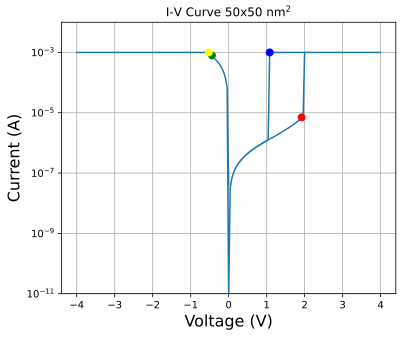

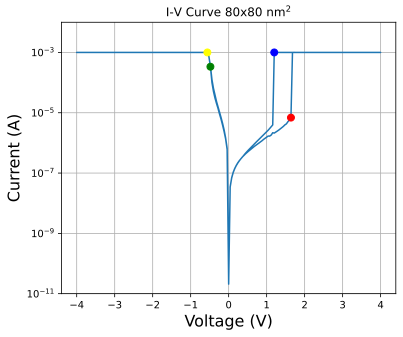

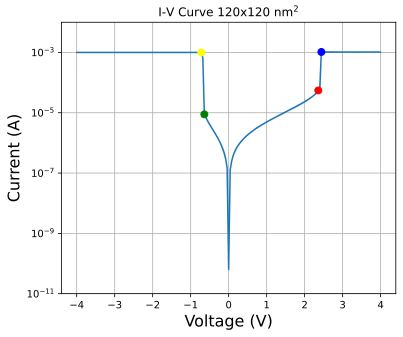

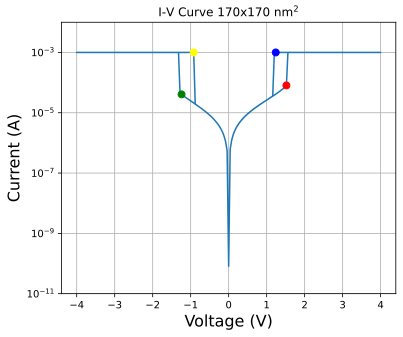

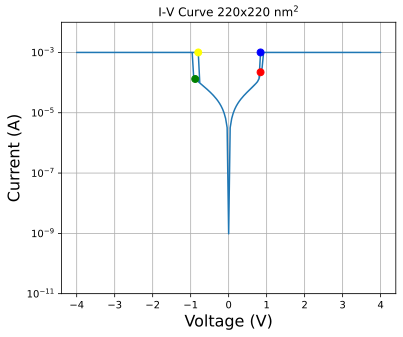

In [59]:
for x in range(0, len(allFiles), 2):
    plt.rcParams['figure.figsize'] = (6,5)
    fig, ax = plt.subplots(figsize =(6, 5))
    ax.set_title("I-V Curve " + allFiles[x].size)
    plt.grid()
    plt.xlabel('Voltage (V)', fontsize=16);
    plt.ylabel('Current (A)', fontsize=16);

    plt.semilogy(allFiles[x].V + allFiles[x+1].V, allFiles[x].I + allFiles[x+1].I)

    # plt.semilogy(allFiles[x].runData1[0], allFiles[x].runData1[2])
    # plt.semilogy(allFiles[x].runData2[0], allFiles[x].runData2[2])
    # plt.semilogy(allFiles[x+1].runData1[0],allFiles[x+1].runData1[2])
    # plt.semilogy(allFiles[x+1].runData2[0], allFiles[x+1].runData2[2])

    pointSize = 7
    x1 = allFiles[x].largestGradientVoltage1
    y1 = allFiles[x].largestGradientCurrent1
    plt.plot(x1, y1, marker="o", markersize=pointSize, markeredgecolor="red", markerfacecolor="red")
    x2 = allFiles[x + 1].largestGradientVoltage1
    y2 = allFiles[x + 1].largestGradientCurrent1
    plt.plot(x2, y2, marker="o", markersize=pointSize, markeredgecolor="green", markerfacecolor="green")

    x3 = allFiles[x].largestGradientVoltage2
    y3 = allFiles[x].largestGradientCurrent2
    plt.plot(x3, y3, marker="o", markersize=pointSize, markeredgecolor="blue", markerfacecolor="blue")
    x4 = allFiles[x + 1].largestGradientVoltage2
    y4 = allFiles[x + 1].largestGradientCurrent2
    plt.plot(x4, y4, marker="o", markersize=pointSize, markeredgecolor="yellow", markerfacecolor="yellow")
    ax.set_ylim([1e-11, 1e-2])
    
    plt.savefig("Karsens I-V Curve " + allFiles[x].size + r'.pdf', bbox_inches = 'tight')
    plt.show() 
# set y limits as the same values for all data
# y label bigger

In [60]:

# allFiles[0].getData()

# plt.rcParams['figure.figsize'] = (11,6)
# #plt.plot(x[(x>10) & (x<20)],y[(x>10) & (x<20)])
# plt.figure(123)
# plt.grid()

# vToPlot = []
# iToPlot = []
# for x in range(len(allFiles)):
#     if allFiles[x].size == "120x120":
#         vToPlot.append(allFiles[x].V)
#         iToPlot.append(allFiles[x].I)
        
# #         voltagesToPlot = []
# #         currentsToPlot = []
        
# #         for x in range(len(vToPlot)):
# #             print(iToPlot[x])
# #             if iToPlot[x] < 100:
# #                 voltagesToPlot.append(vToPlot[x])
# #                 currentsToPlot.append(iToPlot[x])
        
        
#         plt.semilogy(allFiles[x].V, allFiles[x].I)
# #         plt.semilogy(voltagesToPlot, currentsToPlot)
        
#         maxI = max(allFiles[x].I)
#         if maxI > 1000:
#             print([index for index, item in enumerate(allFiles[x].I) if item == maxI])
#             print(x, allFiles[x].filePath)

# # plt.semilogy(vToPlot[0], iToPlot[0])
# # print(len(vToPlot))
# plt.semilogy(vToPlot, iToPlot)

# plt.xlabel('Voltage (V)');
# plt.ylabel('Current (A)');

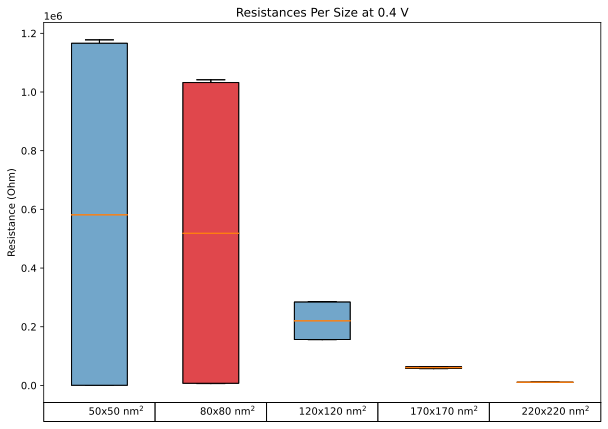

In [61]:
fig, ax = plt.subplots(figsize =(10, 7))
 
# # Creating plot
dataToPlot = []

for size in uniqueNegSizes:
    currentForSize = []
    for x in range(len(allFiles)):
        if allFiles[x].size == size:
            currentForSize.append(np.absolute(allFiles[x].resitances[0]))
            currentForSize.append(np.absolute(allFiles[x].resitances[1]))

            
    dataToPlot.append(currentForSize)
    
plt.boxplot(dataToPlot)

# print(np.mean(dataToPlot[0]))
# print(np.mean(dataToPlot[1]))
# print(np.mean(dataToPlot[2]))
# print(np.mean(dataToPlot[3]))
# print(np.mean(dataToPlot[4]))

title = "Resistances Per Size at " + str(voltageToAnalyse) + " V"
ax.set_title(title)
ax.set_ylabel('Resistance (Ohm)')


box = plt.boxplot(dataToPlot, patch_artist=True)
 
red = [224/255, 71/255, 76/255]
blue = [114/255, 166/255, 202/255]

colors = [blue, red, blue, red, blue, red, blue, red, blue, red]
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Plot bars and create text labels for the table
cell_text = [uniqueNegSizes]
plt.table(cellText=cell_text,bbox = [0, -0.05, 1, 0.05])

plt.xticks([])
# show plot
# plt.savefig(title + r'.pdf', bbox_inches = 'tight')
plt.show() 